## **Chapter 3: ANN**
**Iris 2 outputs**
- Cho dữ liệu Iris.xls.
- Xây dựng model để dự đoán: petallength và loại iris từ những thuộc tính còn lại.

In [1]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [5]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [6]:
data = pd.read_excel("data/Iris.xls")
data

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data['species_num'] = [iris_class[i] for i in data.iris]
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
df_train = data.sample(frac=0.7, random_state=0)
df_valid = data.drop(df_train.index)

In [9]:
X_train = df_train.drop(['petallength', 'iris', 'species_num'], axis=1)
X_valid = df_valid.drop(['petallength', 'iris', 'species_num'], axis=1)
y_train = df_train['petallength']
y_valid = df_valid['petallength']
z_train = df_train['species_num']
z_valid = df_valid['species_num']

### **Build model**

In [10]:
inputs = Input(shape=(3,), name='input')
x = Dense(16, activation='relu', name='16')(inputs)
x = Dense(32, activation='relu', name='32')(x)

output1 = Dense(1, name='cont_out')(x)
output2 = Dense(3, activation='softmax', name='cat_out')(x)

In [11]:
model = Model(inputs=inputs, outputs=[output1, output2])

In [12]:
model.compile(loss={'cont_out': 'mean_absolute_error',
            'cat_out': 'sparse_categorical_crossentropy'},
            optimizer='adam',
)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 3)]          0           []                               
                                                                                                  
 16 (Dense)                     (None, 16)           64          ['input[0][0]']                  
                                                                                                  
 32 (Dense)                     (None, 32)           544         ['16[0][0]']                     
                                                                                                  
 cont_out (Dense)               (None, 1)            33          ['32[0][0]']                     
                                                                                              

In [14]:
history = model.fit(X_train, {'cont_out': y_train, 'cat_out': z_train},
                    validation_data=(X_valid,
                    {'cont_out': y_valid, 'cat_out': z_valid}),
                    epochs=100,
                    batch_size=32,
                    verbose = False
)

In [15]:
history_df = pd.DataFrame(history.history)
history_df

,loss,cont_out_loss,cat_out_loss,val_loss,val_cont_out_loss,val_cat_out_loss
0,2.873489,1.455746,1.417743,2.713351,1.204347,1.509004
1,2.504285,1.202580,1.301705,2.373389,1.011100,1.362289
2,2.163476,0.970464,1.193012,2.084625,0.844703,1.239922
3,1.873734,0.754111,1.119623,2.005860,0.865104,1.140757
4,1.805325,0.745799,1.059526,2.018136,0.937828,1.080307
...,...,...,...,...,...,...
95,0.553479,0.215737,0.337742,0.525756,0.213573,0.312183
96,0.546971,0.212756,0.334215,0.526364,0.216147,0.310217
97,0.543988,0.213910,0.330078,0.522049,0.219512,0.302537
98,0.545640,0.214876,0.330765,0.516959,0.221403,0.295556


Minimum loss: 0.5404719114303589


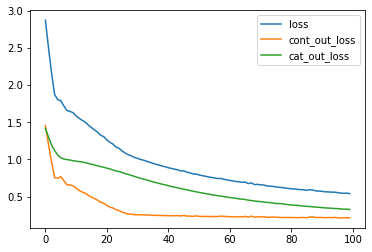

In [16]:
history_df.loc[:, ['loss', 'cont_out_loss', 'cat_out_loss']].plot()
print("Minimum loss: {}".format(history_df['loss'].min()))

In [17]:
y_z_hat_valid = model.predict(X_valid)

In [18]:
y_z_hat_valid[0][0:5]

array([[1.497519 ],
       [1.4590633],
       [1.693748 ],
       [1.5356092],
       [1.6270398]], dtype=float32)

In [19]:
y_z_hat_valid[1][0:5]

array([[0.92275965, 0.07433192, 0.00290839],
       [0.8813684 , 0.1145419 , 0.00408969],
       [0.94323176, 0.05532039, 0.00144782],
       [0.94355875, 0.05382745, 0.00261384],
       [0.9294434 , 0.06699746, 0.0035591 ]], dtype=float32)

In [20]:
y_z_hat_valid[1][-5:]

array([[0.00505783, 0.11662909, 0.87831306],
       [0.02472439, 0.36930162, 0.6059741 ],
       [0.00210275, 0.11882859, 0.8790687 ],
       [0.01021945, 0.24567658, 0.74410397],
       [0.00240981, 0.1434408 , 0.8541494 ]], dtype=float32)

In [21]:
# tìm index của giá trị p lớn nhất của mỗi mẫu => loại hoa
index_array = np.argmax(y_z_hat_valid[1], axis=-1)

In [22]:
index_array[:5]

array([0, 0, 0, 0, 0])

In [23]:
index_array[-5:]

array([2, 2, 2, 2, 2])

In [24]:
y_valid[:5]

0     1.4
9     1.5
14    1.2
19    1.5
21    1.5
Name: petallength, dtype: float64

In [25]:
z_valid[:5]

0     0
9     0
14    0
19    0
21    0
Name: species_num, dtype: int64

In [26]:
z_valid[-5:]

136    2
138    2
140    2
142    2
145    2
Name: species_num, dtype: int64